# Import libary

In [1]:
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Connect to database 

In [6]:
# Read password from file
f= open('../password.txt','r')
pw = f.read()
f.close()

#ODBC (Includes Node.js) (SQL authentication)
s = "Driver={ODBC Driver 18 for SQL Server};Server=tcp:serverz.database.windows.net,1433;Database=DB_LAB03;Uid=tendangnhap;"+f"Pwd={pw};"+"Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30;"


In [7]:
## Connect to the database
conn = pyodbc.connect(s)
cursor = conn.cursor()

# Correlation
**Correlation** (tương quan) là một khái niệm trong thống kê để đo lường mức độ liên quan giữa hai biến số. Nó cho biết liệu hai biến có xu hướng thay đổi cùng chiều hay không.
Trong Python, thư viện `pandas` cung cấp phương thức `corr()` để tính toán hệ số tương quan giữa hai cột hoặc hai Series trong DataFrame.

**Hệ số tương quan** là một số trong khoảng từ -1 đến 1:

+ Nếu hệ số tương quan là 1, điều đó có nghĩa là hai biến tăng hoặc giảm hoàn toàn đồng bộ (tương quan tuyến tính dương hoàn hảo).
+ Nếu hệ số tương quan là -1, điều đó có nghĩa là khi một biến tăng thì biến kia giảm và ngược lại (tương quan tuyến tính âm hoàn hảo).
+ Nếu hệ số tương quan là 0, điều đó có nghĩa là hai biến không có mối liên hệ tuyến tính với nhau.


## Between Safety_score, Average_Student_Attendance, Environment_Score

In [8]:
tbl_Student_Performance = pd.read_sql("SELECT * FROM tbl_Student_Performance", conn)
tbl_School_Survey = pd.read_sql("SELECT * FROM tbl_School_Survey", conn)

<ipython-input-8-9811a83e82e1>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tbl_Student_Performance = pd.read_sql("SELECT * FROM tbl_Student_Performance", conn)
<ipython-input-8-9811a83e82e1>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tbl_School_Survey = pd.read_sql("SELECT * FROM tbl_School_Survey", conn)


In [9]:
joined = pd.merge(tbl_Student_Performance, tbl_School_Survey, on='School_ID')
print(joined.columns)

Index(['School_ID', 'Average_Student_Attendance',
       'Rate_of_Misconducts_per_100_students', 'Safety_Icon', 'Safety_Score',
       'Environment_Icon', 'Environment_Score',
       'CPS_Performance_Policy_Status', 'CPS_Performance_Policy_Level',
       'Healthy_Schools_Certified', 'Adequate_Yearly_Progress_Made',
       'Individualized_Education_Program_Compliance_Rate'],
      dtype='object')


                            Safety_Score  Average_Student_Attendance  \
Safety_Score                    1.000000                    0.339597   
Average_Student_Attendance      0.339597                    1.000000   
Environment_Score               0.585865                    0.245320   

                            Environment_Score  
Safety_Score                         0.585865  
Average_Student_Attendance           0.245320  
Environment_Score                    1.000000  


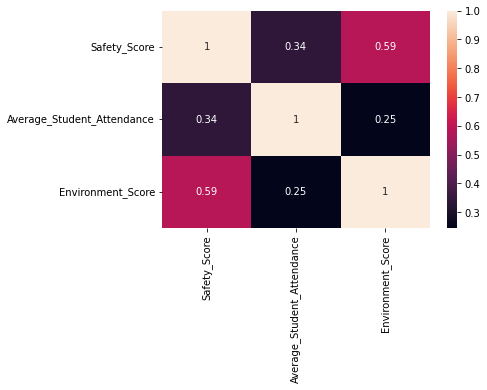

In [10]:
features = ['Safety_Score', 'Average_Student_Attendance', 'Environment_Score']

joined = joined[features]
#Convert to float 
joined['Safety_Score'] = joined['Safety_Score'].astype(float)
joined['Average_Student_Attendance'] = joined['Average_Student_Attendance'].astype(float)
joined['Environment_Score'] = joined['Environment_Score'].astype(float)


# Calculate correlation
correlation = joined.corr()
print(correlation)

# Create heatmap
sns.heatmap(correlation, annot=True)
plt.show()


In [55]:
df = pd.read_csv('../assets/data/Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012__20240521.csv')
# School ID,Name of School,"Elementary, Middle, or High School",Street Address,City,State,ZIP Code,Phone Number,Link ,Network Manager,Collaborative Name,Adequate Yearly Progress Made? ,Track Schedule,CPS Performance Policy Status,CPS Performance Policy Level,Healthy Schools Certified?,Safety Icon ,Safety Score,Family Involvement Icon,Family Involvement Score,Environment Icon ,Environment Score,Instruction Icon ,Instruction Score,Leaders Icon ,Leaders Score ,Teachers Icon ,Teachers Score,Parent Engagement Icon ,Parent Engagement Score,Parent Environment Icon,Parent Environment Score,Average Student Attendance,Rate of Misconducts (per 100 students) ,Average Teacher Attendance,Individualized Education Program Compliance Rate ,Pk-2 Literacy %,Pk-2 Math %,Gr3-5 Grade Level Math %,Gr3-5 Grade Level Read % ,Gr3-5 Keep Pace Read %,Gr3-5 Keep Pace Math %,Gr6-8 Grade Level Math %,Gr6-8 Grade Level Read %,Gr6-8 Keep Pace Math%,Gr6-8 Keep Pace Read %,Gr-8 Explore Math %,Gr-8 Explore Read %,ISAT Exceeding Math %,ISAT Exceeding Reading % ,ISAT Value Add Math,ISAT Value Add Read,ISAT Value Add Color Math,ISAT Value Add Color Read,Students Taking  Algebra %,Students Passing  Algebra %,9th Grade EXPLORE (2009) ,9th Grade EXPLORE (2010) ,10th Grade PLAN (2009) ,10th Grade PLAN (2010) ,Net Change EXPLORE and PLAN,11th Grade Average ACT (2011) ,Net Change PLAN and ACT,College Eligibility %,Graduation Rate %,College Enrollment Rate %,College Enrollment (number of students) ,General Services Route ,Freshman on Track Rate %,RCDTS Code,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,Community Area Number,Community Area Name,Ward,Police District,Location
features = ['ISAT Exceeding Math %',
       'ISAT Exceeding Reading % ', 'ISAT Value Add Math',
       'ISAT Value Add Read']

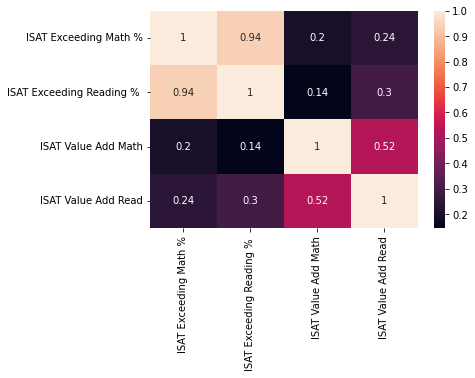

In [56]:
df = df[features]

#Convert to float
df['ISAT Exceeding Math %'] = df['ISAT Exceeding Math %'].astype(float)
df['ISAT Exceeding Reading % '] = df['ISAT Exceeding Reading % '].astype(float)
df['ISAT Value Add Math'] = df['ISAT Value Add Math'].astype(float)
df['ISAT Value Add Read'] = df['ISAT Value Add Read'].astype(float)

# Calculate correlation
correlation = df.corr()

# Create heatmap
sns.heatmap(correlation, annot=True)
plt.show()